In [1]:
import numpy as np
from numpy import array
from numpy import savetxt
import math
from scipy.fft import dct
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns
import IPython.display as ipd
import librosa
import tensorflow as tf
from tensorflow.keras.regularizers import l2
import pathlib

2024-04-09 06:20:27.766242: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_18SourceLocationImplE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/

### Carga Audios

In [2]:
#Parámetros
sampling_rate = 4096
duration = 2

#Calcula número de muestras
num_muestras = sampling_rate*duration
num_muestras

#Vector de clases
clases_vec = [0,1]
emotion_vec = ["Other","Angry"]

In [3]:
#Carga Audios Entrenamiento (English)
#---------------------------------------------------------
#Carpeta con los audios de enojo (Angry)
trainAudioAngryPath = '../Dataset/ESD/Emotional_Speech_Dataset/English/Angry/train'
#Carpeta con los audios de felicidad (Happy)
trainAudioHappyPath = '../Dataset/ESD/Emotional_Speech_Dataset/English/Happy/train'
#Carpeta con los audios neutrales (Neutral)
trainAudioNeutralPath = '../Dataset/ESD/Emotional_Speech_Dataset/English/Neutral/train'
#Carpeta con los audios de tristeza (Sad)
trainAudioSadPath = '../Dataset/ESD/Emotional_Speech_Dataset/English/Sad/train'
#Carpeta con los audios de tristeza (Surprise)
trainAudioSurprisePath = '../Dataset/ESD/Emotional_Speech_Dataset/English/Surprise/train'
#Carga Audios Prueba (English)
#---------------------------------------------------------
#Carpeta con los audios de enojo (Angry)
testAudioAngryPath = '../Dataset/ESD/Emotional_Speech_Dataset/English/Angry/test'
#Carpeta con los audios de felicidad (Happy)
testAudioHappyPath = '../Dataset/ESD/Emotional_Speech_Dataset/English/Happy/test'
#Carpeta con los audios neutrales (Neutral)
testAudioNeutralPath = '../Dataset/ESD/Emotional_Speech_Dataset/English/Neutral/test'
#Carpeta con los audios de tristeza (Sad)
testAudioSadPath = '../Dataset/ESD/Emotional_Speech_Dataset/English/Sad/test'
#Carpeta con los audios de tristeza (Surprise)
testAudioSurprisePath = '../Dataset/ESD/Emotional_Speech_Dataset/English/Surprise/test'
#Carga Audios Evaluación (English)
#---------------------------------------------------------
#Carpeta con los audios de enojo (Angry)
evalAudioAngryPath = '../Dataset/ESD/Emotional_Speech_Dataset/English/Angry/evaluation'
#Carpeta con los audios de felicidad (Happy)
evalAudioHappyPath = '../Dataset/ESD/Emotional_Speech_Dataset/English/Happy/evaluation'
#Carpeta con los audios neutrales (Neutral)
evalAudioNeutralPath = '../Dataset/ESD/Emotional_Speech_Dataset/English/Neutral/evaluation'
#Carpeta con los audios de tristeza (Sad)
evalAudioSadPath = '../Dataset/ESD/Emotional_Speech_Dataset/English/Sad/evaluation'
#Carpeta con los audios de tristeza (Surprise)
evalAudioSurprisePath = '../Dataset/ESD/Emotional_Speech_Dataset/English/Surprise/evaluation'



#Carga Audios Entrenamiento (Chinese)
#---------------------------------------------------------
#Carpeta con los audios de enojo (Angry)
trainAudioAngryPathC = '../Dataset/ESD/Emotional_Speech_Dataset/Chinese/Angry/train'
#Carpeta con los audios de felicidad (Happy)
trainAudioHappyPathC = '../Dataset/ESD/Emotional_Speech_Dataset/Chinese/Happy/train'
#Carpeta con los audios neutrales (Neutral)
trainAudioNeutralPathC = '../Dataset/ESD/Emotional_Speech_Dataset/Chinese/Neutral/train'
#Carpeta con los audios de tristeza (Sad)
trainAudioSadPathC = '../Dataset/ESD/Emotional_Speech_Dataset/Chinese/Sad/train'
#Carpeta con los audios de tristeza (Surprise)
trainAudioSurprisePathC = '../Dataset/ESD/Emotional_Speech_Dataset/Chinese/Surprise/train'
#Carga Audios Prueba (Chinese)
#---------------------------------------------------------
#Carpeta con los audios de enojo (Angry)
testAudioAngryPathC = '../Dataset/ESD/Emotional_Speech_Dataset/Chinese/Angry/test'
#Carpeta con los audios de felicidad (Happy)
testAudioHappyPathC = '../Dataset/ESD/Emotional_Speech_Dataset/Chinese/Happy/test'
#Carpeta con los audios neutrales (Neutral)
testAudioNeutralPathC = '../Dataset/ESD/Emotional_Speech_Dataset/Chinese/Neutral/test'
#Carpeta con los audios de tristeza (Sad)
testAudioSadPathC = '../Dataset/ESD/Emotional_Speech_Dataset/Chinese/Sad/test'
#Carpeta con los audios de tristeza (Surprise)
testAudioSurprisePathC = '../Dataset/ESD/Emotional_Speech_Dataset/Chinese/Surprise/test'
#Carga Audios Evaluación (Chinese)
#---------------------------------------------------------
#Carpeta con los audios de enojo (Angry)
evalAudioAngryPathC = '../Dataset/ESD/Emotional_Speech_Dataset/Chinese/Angry/evaluation'
#Carpeta con los audios de felicidad (Happy)
evalAudioHappyPathC = '../Dataset/ESD/Emotional_Speech_Dataset/Chinese/Happy/evaluation'
#Carpeta con los audios neutrales (Neutral)
evalAudioNeutralPathC = '../Dataset/ESD/Emotional_Speech_Dataset/Chinese/Neutral/evaluation'
#Carpeta con los audios de tristeza (Sad)
evalAudioSadPathC = '../Dataset/ESD/Emotional_Speech_Dataset/Chinese/Sad/evaluation'
#Carpeta con los audios de tristeza (Surprise)
evalAudioSurprisePathC = '../Dataset/ESD/Emotional_Speech_Dataset/Chinese/Surprise/evaluation'

In [4]:
#Función para cargar audios de una carpeta
def loadAudio(pathAudio, label):
    #Encuentra los archivos con extensión .wav y los pone en una lista
    files = librosa.util.find_files(pathAudio, ext=['wav']) 
    #Convierte la lista en un arreglo numpy
    files = np.asarray(files)

    #Crea lista de audios vacía
    Audios = []

    #Lee los audios y los almacena en la lista de audios
    for archivo in files: 
        audio = librosa.load(archivo, sr=sampling_rate, mono=True, duration=duration)
        #calcula espectrograma
        spectrogram = np.abs(librosa.stft(audio[0], n_fft=512, hop_length=256))
        #calcula espectrograma en decibeles 
        spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
        
        #Calcula la energía máxima por columna de tiempo
        max_energy = np.empty(spectrogram_db.shape[1])
        for i in range(spectrogram_db.shape[1]):
            max_energy[i] = np.mean(spectrogram_db[:,i])
            
        #Guarda posición inicial de dato de muestro
        for i in range(1, spectrogram_db.shape[1]):
            diff_energy = abs(max_energy[i]-max_energy[i-1])
            if(diff_energy >= 5):
                #Número de columnas
                col = spectrogram_db.shape[1]
                #Muestras por columna
                muesXcol = int(num_muestras/col)
                #Posición inicial
                start_pos = (i * muesXcol)
                break
        
        #Lee audio nuevamente pero agregando 2 segundos
        audio = librosa.load(archivo, sr=sampling_rate, mono=True, duration=duration+2)     
        #Toma 2 segundos de audio a partir de donde empieza el sonido
        new_audio = audio[0][start_pos : start_pos+num_muestras]
        
        Audios.append(new_audio)
    
    #Crea nueva lista de audios con igual dimensiones
    Audios_equal_dim = []
    
    for audio in Audios:
        
        if audio.shape[0]<num_muestras:
            sample = np.append(audio,np.zeros(num_muestras-audio.shape[0]))
        else:
            sample = audio[0:num_muestras]
        
        #Calcula media y desviación estandar
        mean = np.mean(sample)
        sd = np.std(sample)
        #Calcula ruido blanco
        white_noise = np.random.normal(loc = mean, scale = abs(sd/50), size = num_muestras)
        
        #Concatena audio más ruido
        Audios_equal_dim.append(sample+white_noise)
            
    #Regresa audios
    return np.asarray(Audios_equal_dim), np.full(len(Audios), label)

In [5]:
#Carga Audios Entrenamiento
#---------------------------------------------------------
trainAudiosAngry, trainLabelAngry = loadAudio(trainAudioAngryPath, clases_vec[1])
trainAudiosAngryC, trainLabelAngryC = loadAudio(trainAudioAngryPathC, clases_vec[1])

trainAudiosHappy, trainLabelHappy = loadAudio(trainAudioHappyPath, clases_vec[0])
trainAudiosHappyC, trainLabelHappyC = loadAudio(trainAudioHappyPathC, clases_vec[0])
trainAudiosNeutral, trainLabelNeutral = loadAudio(trainAudioNeutralPath, clases_vec[0])
trainAudiosNeutralC, trainLabelNeutralC = loadAudio(trainAudioNeutralPathC, clases_vec[0])
trainAudiosSad, trainLabelSad = loadAudio(trainAudioSadPath, clases_vec[0])
trainAudiosSadC, trainLabelSadC = loadAudio(trainAudioSadPathC, clases_vec[0])
trainAudiosSurprise, trainLabelSurprise = loadAudio(trainAudioSurprisePath, clases_vec[0])
trainAudiosSurpriseC, trainLabelSurpriseC = loadAudio(trainAudioSurprisePathC, clases_vec[0])

#Carga Audios Prueba
#---------------------------------------------------------
testAudiosAngry, testLabelAngry = loadAudio(testAudioAngryPath, clases_vec[1])
testAudiosAngryC, testLabelAngryC = loadAudio(testAudioAngryPathC, clases_vec[1])

testAudiosHappy, testLabelHappy = loadAudio(testAudioHappyPath, clases_vec[0])
testAudiosHappyC, testLabelHappyC = loadAudio(testAudioHappyPathC, clases_vec[0])
testAudiosNeutral, testLabelNeutral = loadAudio(testAudioNeutralPath, clases_vec[0])
testAudiosNeutralC, testLabelNeutralC = loadAudio(testAudioNeutralPathC, clases_vec[0])
testAudiosSad, testLabelSad = loadAudio(testAudioSadPath, clases_vec[0])
testAudiosSadC, testLabelSadC = loadAudio(testAudioSadPathC, clases_vec[0])
testAudiosSurprise, testLabelSurprise = loadAudio(testAudioSurprisePath, clases_vec[0])
testAudiosSurpriseC, testLabelSurpriseC = loadAudio(testAudioSurprisePathC, clases_vec[0])

#Carga Audios Evaluación
#---------------------------------------------------------
evalAudiosAngry, evalLabelAngry = loadAudio(evalAudioAngryPath, clases_vec[1])
evalAudiosAngryC, evalLabelAngryC = loadAudio(evalAudioAngryPathC, clases_vec[1])

evalAudiosHappy, evalLabelHappy = loadAudio(evalAudioHappyPath, clases_vec[0])
evalAudiosHappyC, evalLabelHappyC = loadAudio(evalAudioHappyPathC, clases_vec[0])
evalAudiosNeutral, evalLabelNeutral = loadAudio(evalAudioNeutralPath, clases_vec[0])
evalAudiosNeutralC, evalLabelNeutralC = loadAudio(evalAudioNeutralPathC, clases_vec[0])
evalAudiosSad, evalLabelSad = loadAudio(evalAudioSadPath, clases_vec[0])
evalAudiosSadC, evalLabelSadC = loadAudio(evalAudioSadPathC, clases_vec[0])
evalAudiosSurprise, evalLabelSurprise = loadAudio(evalAudioSurprisePath, clases_vec[0])
evalAudiosSurpriseC, evalLabelSurpriseC = loadAudio(evalAudioSurprisePathC, clases_vec[0])

In [6]:
#Resumen de datos de entrenamiento
#---------------------------------------------------------
print('Audios de entrenamiento:')
print('Número de audios de enojo:\t', trainAudiosAngry.shape, "Etiqueta: ", trainLabelAngry[0])
print('Número de audios de enojoC:\t', trainAudiosAngryC.shape, "Etiqueta: ", trainLabelAngryC[0])
print('Total audios enojo: ',trainAudiosAngry.shape[0]+trainAudiosAngryC.shape[0])
print("\n")
print('Número de audios de felicidad:\t', trainAudiosHappy.shape, "Etiqueta: ", trainLabelHappy[0])
print('Número de audios de felicidadC:\t', trainAudiosHappyC.shape, "Etiqueta: ", trainLabelHappyC[0])
print('Número de audios neutrales:\t', trainAudiosNeutral.shape, "Etiqueta: ", trainLabelNeutral[0])
print('Número de audios neutralesC:\t', trainAudiosNeutralC.shape, "Etiqueta: ", trainLabelNeutralC[0])
print('Número de audios de tristeza:\t', trainAudiosSad.shape, "Etiqueta: ", trainLabelSad[0])
print('Número de audios de tristezaC:\t', trainAudiosSadC.shape, "Etiqueta: ", trainLabelSadC[0])
print('Número de audios de sorpresa:\t', trainAudiosSurprise.shape, "Etiqueta: ", trainLabelSurprise[0])
print('Número de audios de sorpresaC:\t', trainAudiosSurpriseC.shape, "Etiqueta: ", trainLabelSurpriseC[0])
#Resumen de datos de entrenamiento
#---------------------------------------------------------
print('\nAudios de prueba:')
print('Número de audios de enojo:\t', testAudiosAngry.shape, "Etiqueta: ", testLabelAngry[0])
print('Número de audios de enojoC:\t', testAudiosAngryC.shape, "Etiqueta: ", testLabelAngryC[0])
print('Total audios enojo: ',testAudiosAngry.shape[0]+testAudiosAngryC.shape[0])
print("\n")
print('Número de audios de felicidad:\t', testAudiosHappy.shape, "Etiqueta: ", testLabelHappy[0])
print('Número de audios de felicidadC:\t', testAudiosHappyC.shape, "Etiqueta: ", testLabelHappyC[0])
print('Número de audios neutrales:\t', testAudiosNeutral.shape, "Etiqueta: ", testLabelNeutral[0])
print('Número de audios neutralesC:\t', testAudiosNeutralC.shape, "Etiqueta: ", testLabelNeutralC[0])
print('Número de audios de tristeza:\t', testAudiosSad.shape, "Etiqueta: ", testLabelSad[0])
print('Número de audios de tristezaC:\t', testAudiosSadC.shape, "Etiqueta: ", testLabelSadC[0])
print('Número de audios de sorpresa:\t', testAudiosSurprise.shape, "Etiqueta: ", testLabelSurprise[0])
print('Número de audios de sorpresaC:\t', testAudiosSurpriseC.shape, "Etiqueta: ", testLabelSurpriseC[0])

#Resumen de datos de entrenamiento
#---------------------------------------------------------
print('\nAudios de evaluación:')
print('Número de audios de enojo:\t', evalAudiosAngry.shape, "Etiqueta: ", evalLabelAngry[0])
print('Número de audios de enojoC:\t', evalAudiosAngryC.shape, "Etiqueta: ", evalLabelAngryC[0])
print('Total audios enojo: ',evalAudiosAngry.shape[0]+evalAudiosAngryC.shape[0])
print("\n")
print('Número de audios de felicidad:\t', evalAudiosHappy.shape, "Etiqueta: ", evalLabelHappy[0])
print('Número de audios de felicidadC:\t', evalAudiosHappyC.shape, "Etiqueta: ", evalLabelHappyC[0])
print('Número de audios neutrales:\t', evalAudiosNeutral.shape, "Etiqueta: ", evalLabelNeutral[0])
print('Número de audios neutralesC:\t', evalAudiosNeutralC.shape, "Etiqueta: ", evalLabelNeutralC[0])
print('Número de audios de tristeza:\t', evalAudiosSad.shape, "Etiqueta: ", evalLabelSad[0])
print('Número de audios de tristezaC:\t', evalAudiosSadC.shape, "Etiqueta: ", evalLabelSadC[0])
print('Número de audios de sorpresa:\t', evalAudiosSurprise.shape, "Etiqueta: ", evalLabelSurprise[0])
print('Número de audios de sorpresaC:\t', evalAudiosSurpriseC.shape, "Etiqueta: ", evalLabelSurpriseC[0])

Audios de entrenamiento:
Número de audios de enojo:	 (3000, 8192) Etiqueta:  1
Número de audios de enojoC:	 (3000, 8192) Etiqueta:  1
Total audios enojo:  6000


Número de audios de felicidad:	 (3000, 8192) Etiqueta:  0
Número de audios de felicidadC:	 (3000, 8192) Etiqueta:  0
Número de audios neutrales:	 (3000, 8192) Etiqueta:  0
Número de audios neutralesC:	 (3000, 8192) Etiqueta:  0
Número de audios de tristeza:	 (3000, 8192) Etiqueta:  0
Número de audios de tristezaC:	 (3000, 8192) Etiqueta:  0
Número de audios de sorpresa:	 (3000, 8192) Etiqueta:  0
Número de audios de sorpresaC:	 (3000, 8192) Etiqueta:  0

Audios de prueba:
Número de audios de enojo:	 (300, 8192) Etiqueta:  1
Número de audios de enojoC:	 (300, 8192) Etiqueta:  1
Total audios enojo:  600


Número de audios de felicidad:	 (300, 8192) Etiqueta:  0
Número de audios de felicidadC:	 (300, 8192) Etiqueta:  0
Número de audios neutrales:	 (300, 8192) Etiqueta:  0
Número de audios neutralesC:	 (300, 8192) Etiqueta:  0
Núm

### Prepara audios y etiquetas

In [7]:
#Función para elegir cierto número de muestras de audio y etiquetas aleatoriamente
def random_samples(num_index, num_total, audios, labels):
    random_index = np.random.choice(num_index, num_total//8, replace=False)
    random_audios = audios[random_index]
    random_labels = labels[random_index]
    return random_audios, random_labels

In [8]:
#Numero total de audios de enojo en entrenamiento, prueba y evaluación 
num_aud_angry_train = trainAudiosAngry.shape[0]+trainAudiosAngryC.shape[0]
num_aud_angry_test = testAudiosAngry.shape[0]+testAudiosAngryC.shape[0]
num_aud_angry_eval = evalAudiosAngry.shape[0]+evalAudiosAngryC.shape[0]

#Toma aleatoriamente "num_audios_angry_train" muestras para cada emoción distinta al enojo
trainAudiosHappy, trainLabelHappy = random_samples(trainAudiosHappy.shape[0], num_aud_angry_train, trainAudiosHappy, trainLabelHappy)
trainAudiosHappyC, trainLabelHappyC = random_samples(trainAudiosHappyC.shape[0], num_aud_angry_train, trainAudiosHappyC, trainLabelHappyC)
trainAudiosNeutral, trainLabelNeutral = random_samples(trainAudiosNeutral.shape[0], num_aud_angry_train, trainAudiosNeutral, trainLabelNeutral)
trainAudiosNeutralC, trainLabelNeutralC = random_samples(trainAudiosNeutralC.shape[0], num_aud_angry_train, trainAudiosNeutralC, trainLabelNeutralC)
trainAudiosSad, trainLabelSad = random_samples(trainAudiosSad.shape[0], num_aud_angry_train, trainAudiosSad, trainLabelSad)
trainAudiosSadC, trainLabelSadC = random_samples(trainAudiosSadC.shape[0], num_aud_angry_train, trainAudiosSadC, trainLabelSadC)
trainAudiosSurprise, trainLabelSurprise = random_samples(trainAudiosSurprise.shape[0], num_aud_angry_train, trainAudiosSurprise, trainLabelSurprise)
trainAudiosSurpriseC, trainLabelSurpriseC = random_samples(trainAudiosSurpriseC.shape[0], num_aud_angry_train, trainAudiosSurpriseC, trainLabelSurpriseC)

#Toma aleatoriamente "num_audios_angry_test" muestras para cada emoción distinta al enojo
testAudiosHappy, testLabelHappy = random_samples(testAudiosHappy.shape[0], num_aud_angry_test, testAudiosHappy, testLabelHappy)
testAudiosHappyC, testLabelHappyC = random_samples(testAudiosHappyC.shape[0], num_aud_angry_test, testAudiosHappyC, testLabelHappyC)
testAudiosNeutral, testLabelNeutral = random_samples(testAudiosNeutral.shape[0], num_aud_angry_test, testAudiosNeutral, testLabelNeutral)
testAudiosNeutralC, testLabelNeutralC = random_samples(testAudiosNeutralC.shape[0], num_aud_angry_test, testAudiosNeutralC, testLabelNeutralC)
testAudiosSad, testLabelSad = random_samples(testAudiosSad.shape[0], num_aud_angry_test, testAudiosSad, testLabelSad)
testAudiosSadC, testLabelSadC = random_samples(testAudiosSadC.shape[0], num_aud_angry_test, testAudiosSadC, testLabelSadC)
testAudiosSurprise, testLabelSurprise = random_samples(testAudiosSurprise.shape[0], num_aud_angry_test, testAudiosSurprise, testLabelSurprise)
testAudiosSurpriseC, testLabelSurpriseC = random_samples(testAudiosSurpriseC.shape[0], num_aud_angry_test, testAudiosSurpriseC, testLabelSurpriseC)

#Toma aleatoriamente "num_audios_angry_eval" muestras para cada emoción distinta al enojo
evalAudiosHappy, evalLabelHappy = random_samples(evalAudiosHappy.shape[0], num_aud_angry_eval, evalAudiosHappy, evalLabelHappy)
evalAudiosHappyC, evalLabelHappyC = random_samples(evalAudiosHappyC.shape[0], num_aud_angry_eval, evalAudiosHappyC, evalLabelHappyC)
evalAudiosNeutral, evalLabelNeutral = random_samples(evalAudiosNeutral.shape[0], num_aud_angry_eval, evalAudiosNeutral, evalLabelNeutral)
evalAudiosNeutralC, evalLabelNeutralC = random_samples(evalAudiosNeutralC.shape[0], num_aud_angry_eval, evalAudiosNeutralC, evalLabelNeutralC)
evalAudiosSad, evalLabelSad = random_samples(evalAudiosSad.shape[0], num_aud_angry_eval, evalAudiosSad, evalLabelSad)
evalAudiosSadC, evalLabelSadC = random_samples(evalAudiosSadC.shape[0], num_aud_angry_eval, evalAudiosSadC, evalLabelSadC)
evalAudiosSurprise, evalLabelSurprise = random_samples(evalAudiosSurprise.shape[0], num_aud_angry_eval, evalAudiosSurprise, evalLabelSurprise)
evalAudiosSurpriseC, evalLabelSurpriseC = random_samples(evalAudiosSurpriseC.shape[0], num_aud_angry_eval, evalAudiosSurpriseC, evalLabelSurpriseC)

In [9]:
#Función para concatenar audios y etiquetas
def concatenaAudios(audio1, audio2, label1, label2):
    audio1 = np.concatenate([audio1, audio2])
    label1 = np.concatenate([label1, label2])
    return audio1, label1

In [10]:
#Concatena audios y etiquetas de entrenamiento
#---------------------------------------------------------
trainAudios, trainLabels = concatenaAudios(trainAudiosAngry, trainAudiosAngryC, trainLabelAngry, trainLabelAngryC)
trainAudios, trainLabels = concatenaAudios(trainAudios, trainAudiosHappy, trainLabels, trainLabelHappy)
trainAudios, trainLabels = concatenaAudios(trainAudios, trainAudiosHappyC, trainLabels, trainLabelHappyC)
trainAudios, trainLabels = concatenaAudios(trainAudios, trainAudiosNeutral, trainLabels, trainLabelNeutral)
trainAudios, trainLabels = concatenaAudios(trainAudios, trainAudiosNeutralC, trainLabels, trainLabelNeutralC)
trainAudios, trainLabels = concatenaAudios(trainAudios, trainAudiosSad, trainLabels, trainLabelSad)
trainAudios, trainLabels = concatenaAudios(trainAudios, trainAudiosSadC, trainLabels, trainLabelSadC)
trainAudios, trainLabels = concatenaAudios(trainAudios, trainAudiosSurprise, trainLabels, trainLabelSurprise)
trainAudios, trainLabels = concatenaAudios(trainAudios, trainAudiosSurpriseC, trainLabels, trainLabelSurpriseC)

#Concatena audios y etiquetas de prueba
#---------------------------------------------------------
testAudios, testLabels = concatenaAudios(testAudiosAngry, testAudiosAngryC, testLabelAngry, testLabelAngryC)
testAudios, testLabels = concatenaAudios(testAudios, testAudiosHappy, testLabels, testLabelHappy)
testAudios, testLabels = concatenaAudios(testAudios, testAudiosHappyC, testLabels, testLabelHappyC)
testAudios, testLabels = concatenaAudios(testAudios, testAudiosNeutral, testLabels, testLabelNeutral)
testAudios, testLabels = concatenaAudios(testAudios, testAudiosNeutralC, testLabels, testLabelNeutralC)
testAudios, testLabels = concatenaAudios(testAudios, testAudiosSad, testLabels, testLabelSad)
testAudios, testLabels = concatenaAudios(testAudios, testAudiosSadC, testLabels, testLabelSadC)
testAudios, testLabels = concatenaAudios(testAudios, testAudiosSurprise, testLabels, testLabelSurprise)
testAudios, testLabels = concatenaAudios(testAudios, testAudiosSurpriseC, testLabels, testLabelSurpriseC)

#Concatena audios y etiquetas de evaluación
#---------------------------------------------------------
evalAudios, evalLabels = concatenaAudios(evalAudiosAngry, evalAudiosAngryC, evalLabelAngry, evalLabelAngryC)
evalAudios, evalLabels = concatenaAudios(evalAudios, evalAudiosHappy, evalLabels, evalLabelHappy)
evalAudios, evalLabels = concatenaAudios(evalAudios, evalAudiosHappyC, evalLabels, evalLabelHappyC)
evalAudios, evalLabels = concatenaAudios(evalAudios, evalAudiosNeutral, evalLabels, evalLabelNeutral)
evalAudios, evalLabels = concatenaAudios(evalAudios, evalAudiosNeutralC, evalLabels, evalLabelNeutralC)
evalAudios, evalLabels = concatenaAudios(evalAudios, evalAudiosSad, evalLabels, evalLabelSad)
evalAudios, evalLabels = concatenaAudios(evalAudios, evalAudiosSadC, evalLabels, evalLabelSadC)
evalAudios, evalLabels = concatenaAudios(evalAudios, evalAudiosSurprise, evalLabels, evalLabelSurprise)
evalAudios, evalLabels = concatenaAudios(evalAudios, evalAudiosSurpriseC, evalLabels, evalLabelSurpriseC)

In [11]:
#Resumen de audios
print('Número de audios de entrenamiento: ', trainAudios.shape, "Número de etiquetaa: ", trainLabels.shape)
print('Número de audios de prueba: ', testAudios.shape, "Número de etiqueta: ", testLabels.shape)
print('Número de audios evaluación: ', evalAudios.shape, "Número de etiqueta: ", evalLabels.shape)

Número de audios de entrenamiento:  (12000, 8192) Número de etiquetaa:  (12000,)
Número de audios de prueba:  (1200, 8192) Número de etiqueta:  (1200,)
Número de audios evaluación:  (800, 8192) Número de etiqueta:  (800,)


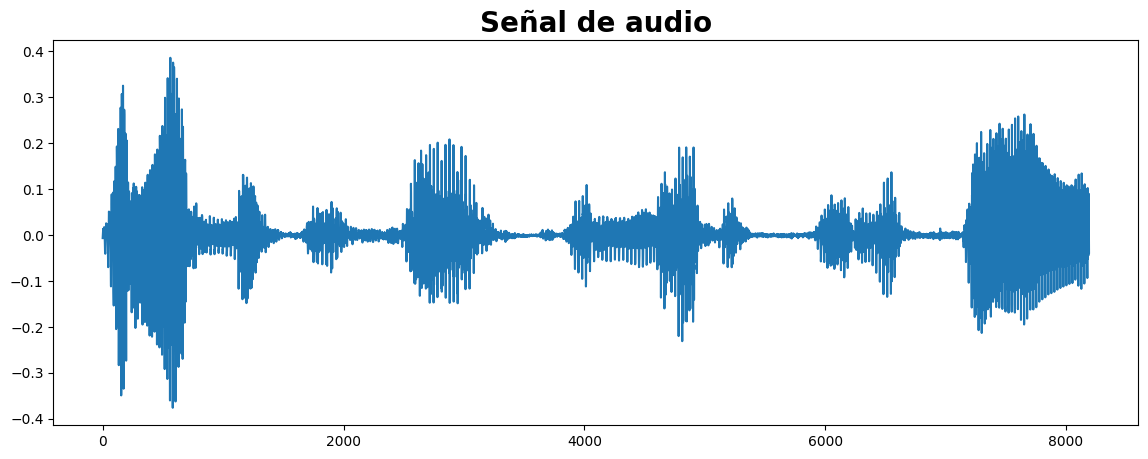

In [12]:
#Prueba
num_audio = 5
#Grafica la señal de primer audio
plt.figure(figsize=(14, 5))
plt.plot(trainAudios[num_audio])
plt.title("Señal de audio", {'fontsize':20, 'fontweight':'bold'})
plt.show()
#Reproduce audio
ipd.Audio(trainAudios[num_audio], rate= sampling_rate)

### Calcula MFCCs

In [13]:
#Parámetros para calcular espectrograma
#-------------------------------------
#Cantidad de datos por audio
Size_data = num_muestras
#Tamaño de la ventana
Size_win = 256
#Tamaño de offset
Size_off = 128
#Número total de ventaneos
total_win_num = int(((Size_data-Size_win)/Size_off)+1)
total_win_num

#Parámetros para calcular MFCCs
#------------------------------
#Frecuencia mínima y máxima
frec_min = 20
frec_max = sampling_rate/2
#numero de bandas de Mel
Mel_bands = 20

In [14]:
#Función para calcular un filtro triangular
def triangular_fun(lower_lim, medium_lim, upper_lim, points_num):
    #Crea vector de coeficientes
    coefficients = np.zeros(points_num)
    #Calcula coeficientes
    for j in range(points_num):
        
        if j>=lower_lim and j<=medium_lim:
            coefficients[j] = (j - lower_lim) / (medium_lim - lower_lim)
        elif j>medium_lim and j<=upper_lim:
            coefficients[j] = (upper_lim - j) / (upper_lim - medium_lim)
        else: 
            coefficients[j] = 0
    #Regresa coeficientes
    return coefficients

def triangular_filter_mat(frec_min, frec_max, Mel_bands):
    #numero de límites de bandas
    Mel_num_limits = Mel_bands+2
    #Frecuencia mínima y máxima en Mels
    frec_min_mel = 2595 * np.log10(1 + frec_min / 700)
    frec_max_mel = 2595 * np.log10(1 + frec_max / 700)
    #Tamaño de límite de separación de bandas en Mels
    separation_mel = (frec_max_mel-frec_min_mel)/(Mel_num_limits-1)
    
    #Crea vecor de límites de bandas mel
    mel_limits = np.zeros(Mel_num_limits)
    #Crea vector de límites equidistantes en Mels
    mel_limits[0] = frec_min_mel
    for i in range(1,Mel_num_limits):
        mel_limits[i] = mel_limits[i-1]+separation_mel
    
    #Crea vecor de límites de bandas en Hertz
    Hz_limits = np.zeros(Mel_num_limits)
    #Conversión de límites de Mel a Hertz
    for i in range(Mel_num_limits):
        Hz_limits[i] = 700 * (10**(mel_limits[i]/ 2595) - 1)
        
    #Crea vecor de límites de bandas en FFT bins
    FFT_bins = np.zeros(Mel_num_limits)
    #Cambia valores de frcuencia (Hertz) por valores al FFT bin más cercano, 
    for i in range(Mel_num_limits):
        FFT_bins[i] = math.floor((Size_win//2+1)*Hz_limits[i]/frec_max)
    FFT_bins[Mel_num_limits-1] = Size_win//2
    
    #Define matriz de filtros triangulares
    Trian_mat= np.zeros((Mel_bands, Size_win//2+1))
    #Calula banco de filtros tringulares
    for i in range(2,Mel_num_limits):
        trian_filter = triangular_fun(FFT_bins[i-2], FFT_bins[i-1], FFT_bins[i], Size_win//2+1)
        Trian_mat[i-2,:] = trian_filter
    
    return Trian_mat

#Preénfasis
def preemphasis(signal, coeff=0.97):
    return np.append(signal[0], signal[1:] - coeff * signal[:-1])

#Ventaneo
def windowing(Hamming_window, preemphasized_signal):
    #Define matriz de ventaneos
    Win_mat= np.zeros((Size_win, total_win_num))

    #Ciclo para realizar ventaneo
    cont = 0
    for i in range(total_win_num):
        for j in range(Size_win):
            Win_mat[j][i] = Hamming_window[j]*preemphasized_signal[cont]
            cont = cont+1
        cont = cont-(Size_win-Size_off)
    
    return Win_mat

#fft
def fft_mat(Win_mat):
    #Define matriz de espectrograma
    FFT_mat= np.zeros((1+Size_win//2, total_win_num))
    #Ciclo para realizar FFT por ventana
    for i in range(total_win_num):
        FFT = abs(np.fft.fft(Win_mat[:,i], n = Size_win))
        FFT_mat[:,i] = FFT[0:1+Size_win//2]
    
    return FFT_mat

#Crea ventana Hamming con tamaño Size_win
Hamming_window = np.zeros(Size_win)
for i in range(Size_win):
    Hamming_window[i] = 0.53836-0.46164*(np.cos((2*np.pi*i)/(Size_win-1)));

In [15]:
#Función para calcular MFCCs
def calculoMFCCs(Audios):
    
    number = 1 #Inicializa numero de imagen
    mfccs = [] #Inicializa lista vacía de mfccs
    
    #Caucula Filtros triangulares
    Trian_mat = triangular_filter_mat(frec_min, frec_max, Mel_bands) 
    
    #Ciclo for para calcular MFCCs de cada audio
    for audio in Audios:
        #Espectrograma
        #------------------------------------------------------------------------
        #Preénfasis
        preemphasized_signal = preemphasis(audio)
        #Ventaneo
        Win_mat = windowing(Hamming_window, preemphasized_signal)
        #Fast Fourier Transform (FFT)
        FFT_mat = fft_mat(Win_mat)
        #Aplica banco de filtros triangulares a espectrograma
        Mel_mat = np.dot(Trian_mat, FFT_mat)
        #Aplica transformación logarítmita para escala más adecuada
        Mel_mat_log = 13*np.log(Mel_mat)
        #Aplica transformada de coseno discreta (DCT)
        mfcc = dct(Mel_mat_log, type=2, axis=0, norm='ortho')[:Mel_bands]
     
        #Agrega MFCC resultante a lista
        mfccs.append(mfcc)
        
    return np.asarray(mfccs)

In [16]:
#Caulcula MFCCs de entrenamiento
trainMFCCs = calculoMFCCs(trainAudios)
#Caulcula MFCCs de prueba
testMFCCs = calculoMFCCs(testAudios)
#Caulcula MFCCs de evaluación
evalMFCCs = calculoMFCCs(evalAudios)

In [17]:
#Dimensiones de MFCCs
print('Las dimenciones de los MFCCs de entrenamiento son:\t', trainMFCCs.shape)
print('Las dimenciones de los MFCCs de prueba son:\t\t', testMFCCs.shape)
print('Las dimenciones de los MFCCs de evaluación son:\t\t', evalMFCCs.shape)

#Valor máximo en el arreglo de MFCCs
print('\nEl valor máximo de los MFCCs son: ', np.amax(trainMFCCs))
#Valor mínimo en el arreglo de MFCCs
print('El valor mínimo de los MFCCs son: ', np.amin(trainMFCCs))

Las dimenciones de los MFCCs de entrenamiento son:	 (12000, 20, 63)
Las dimenciones de los MFCCs de prueba son:		 (1200, 20, 63)
Las dimenciones de los MFCCs de evaluación son:		 (800, 20, 63)

El valor máximo de los MFCCs son:  113.56462542642362
El valor mínimo de los MFCCs son:  -342.7772285712273


### Muestra Audios

In [18]:
#Muestra de audio a indicar
num_Audio = 11005
AudioSample = trainAudios[num_Audio]

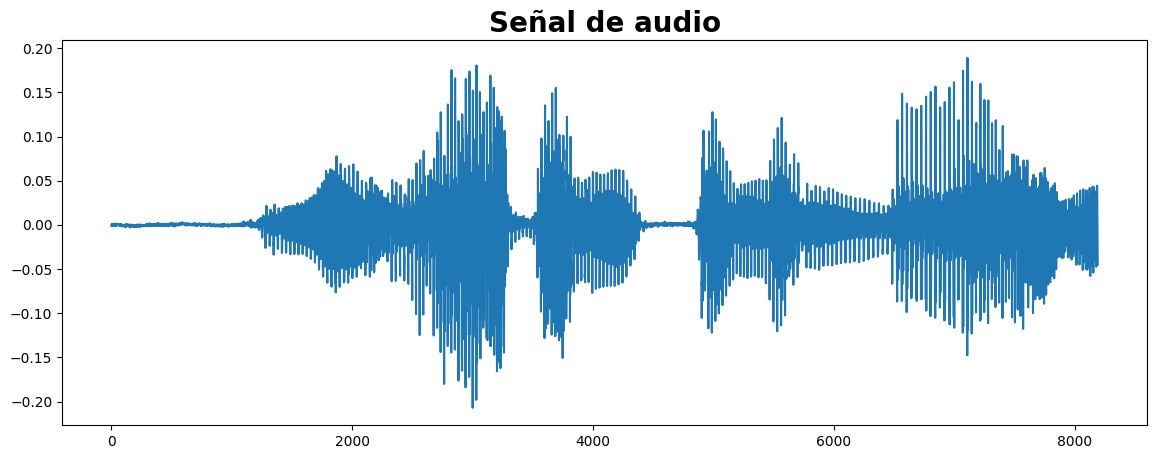

In [19]:
#Grafica la seña de audio elegida
plt.figure(figsize=(14, 5))
plt.plot(AudioSample)
plt.title("Señal de audio", {'fontsize':20, 'fontweight':'bold'})
plt.show()

#Reproduce audio
ipd.Audio(AudioSample, rate= sampling_rate)

(20, 63)


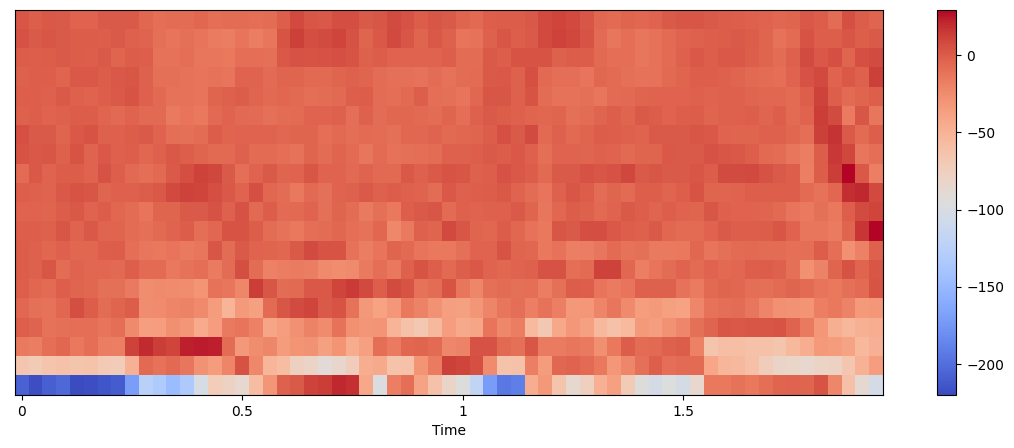

In [20]:
#Muestra MFCC del audio elegido
# Plot the figure
print(trainMFCCs[num_Audio].shape)
plt.figure(figsize=(14, 5))
librosa.display.specshow(trainMFCCs[num_Audio], sr=sampling_rate, hop_length=Size_off, x_axis='time')
plt.colorbar()

(20, 63)


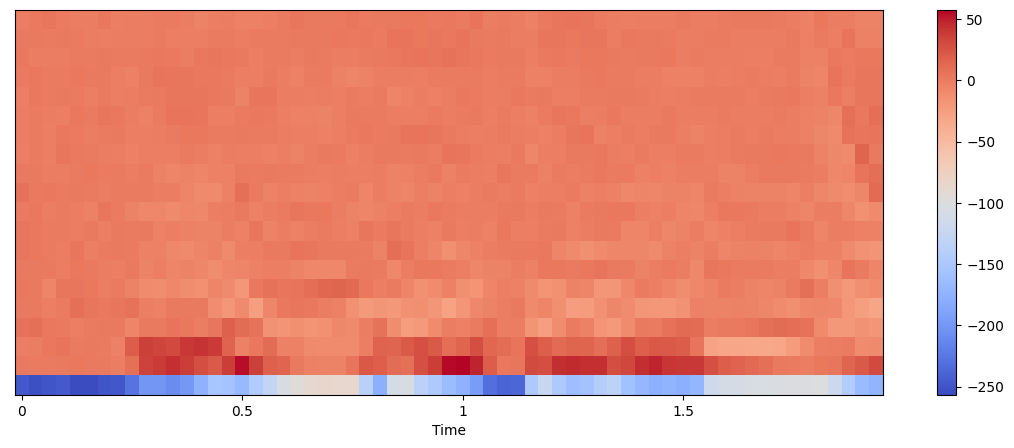

In [21]:
###COMPARATIVA CON LIBROSA###
#Muestra MFCC del audio elegido
mfcc_lib = librosa.feature.mfcc(y=trainAudios[num_Audio], 
                                sr=sampling_rate, 
                                n_mfcc=Mel_bands, 
                                hop_length=Size_off, 
                                n_fft=Size_win,
                                n_mels = Mel_bands,
                               center=False)

print(mfcc_lib.shape)
# Plot the figure
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfcc_lib, sr=sampling_rate, hop_length=Size_off, x_axis='time')
plt.colorbar()

###  Modelo CNN

In [23]:
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop
#Instancia modelo con arquitectura de la red
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', 
                         kernel_regularizer=l2(0.57), padding='same', strides=1,
                         input_shape=(trainMFCCs.shape[1], trainMFCCs.shape[2], 1)),
  tf.keras.layers.MaxPooling2D(3, 3), 
  tf.keras.layers.Conv2D(16, (3,3), padding='same', strides=1, activation='relu'),
  tf.keras.layers.Conv2D(16, (3,3), padding='same', strides=1, activation='relu'),
  tf.keras.layers.MaxPooling2D(3, 3),
    
  tf.keras.layers.Flatten(),
    
  tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.57)),
  tf.keras.layers.Dropout(0.36),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.36),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


#Compila el modelo
new_learning_rate = 0.00047
optimizer = Adam(learning_rate=new_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Imprime un resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 20, 63, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 21, 32)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 21, 16)         4624      
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 21, 16)         2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 224)              

In [24]:
from keras.callbacks import ModelCheckpoint

epochs=250
# Crear ModelCheckpoint callback
model_checkpoint = ModelCheckpoint('best_model_checkpoint/best_model_epoch_{epoch:02d}.h5', monitor='val_loss', save_best_only=True, 
                                   save_weights_only=False, mode='min', verbose=1)
# Luego ejecutas model.fit
history = model.fit(trainMFCCs, trainLabels, validation_data=(testMFCCs, testLabels), 
                    epochs=epochs, batch_size=490, verbose=2, callbacks=[model_checkpoint])

2024-04-09 06:27:19.761095: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 60480000 exceeds 10% of free system memory.
2024-04-09 06:27:19.825384: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 60480000 exceeds 10% of free system memory.


Epoch 1/250


2024-04-09 06:27:21.038681: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-04-09 06:27:21.627661: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:234] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-04-09 06:27:21.627697: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:237] Used ptxas at ptxas
2024-04-09 06:27:21.627752: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-04-09 06:27:22.140860: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.



Epoch 1: val_loss improved from inf to 28.51118, saving model to best_model_checkpoint/best_model_epoch_01.h5
25/25 - 3s - loss: 32.5857 - accuracy: 0.4922 - val_loss: 28.5112 - val_accuracy: 0.4800 - 3s/epoch - 126ms/step
Epoch 2/250

Epoch 2: val_loss improved from 28.51118 to 23.00915, saving model to best_model_checkpoint/best_model_epoch_02.h5
25/25 - 0s - loss: 25.8627 - accuracy: 0.5111 - val_loss: 23.0091 - val_accuracy: 0.5358 - 254ms/epoch - 10ms/step
Epoch 3/250

Epoch 3: val_loss improved from 23.00915 to 18.42303, saving model to best_model_checkpoint/best_model_epoch_03.h5
25/25 - 0s - loss: 20.7892 - accuracy: 0.5294 - val_loss: 18.4230 - val_accuracy: 0.5733 - 249ms/epoch - 10ms/step
Epoch 4/250

Epoch 4: val_loss improved from 18.42303 to 14.68372, saving model to best_model_checkpoint/best_model_epoch_04.h5
25/25 - 0s - loss: 16.6161 - accuracy: 0.5454 - val_loss: 14.6837 - val_accuracy: 0.6133 - 234ms/epoch - 9ms/step
Epoch 5/250

Epoch 5: val_loss improved from 14.

25/25 - 0s - loss: 0.5158 - accuracy: 0.7977 - val_loss: 0.5374 - val_accuracy: 0.7675 - 239ms/epoch - 10ms/step
Epoch 37/250

Epoch 37: val_loss did not improve from 0.53737
25/25 - 0s - loss: 0.5116 - accuracy: 0.7978 - val_loss: 0.5375 - val_accuracy: 0.7708 - 217ms/epoch - 9ms/step
Epoch 38/250

Epoch 38: val_loss improved from 0.53737 to 0.52729, saving model to best_model_checkpoint/best_model_epoch_38.h5
25/25 - 0s - loss: 0.5177 - accuracy: 0.7941 - val_loss: 0.5273 - val_accuracy: 0.7875 - 234ms/epoch - 9ms/step
Epoch 39/250

Epoch 39: val_loss did not improve from 0.52729
25/25 - 0s - loss: 0.5035 - accuracy: 0.8018 - val_loss: 0.5964 - val_accuracy: 0.7308 - 206ms/epoch - 8ms/step
Epoch 40/250

Epoch 40: val_loss did not improve from 0.52729
25/25 - 0s - loss: 0.5072 - accuracy: 0.8003 - val_loss: 0.5766 - val_accuracy: 0.7350 - 213ms/epoch - 9ms/step
Epoch 41/250

Epoch 41: val_loss did not improve from 0.52729
25/25 - 0s - loss: 0.5290 - accuracy: 0.7843 - val_loss: 0.5843

Epoch 81/250

Epoch 81: val_loss did not improve from 0.46970
25/25 - 0s - loss: 0.4176 - accuracy: 0.8481 - val_loss: 0.5914 - val_accuracy: 0.7308 - 213ms/epoch - 9ms/step
Epoch 82/250

Epoch 82: val_loss did not improve from 0.46970
25/25 - 0s - loss: 0.4153 - accuracy: 0.8476 - val_loss: 0.5426 - val_accuracy: 0.7717 - 212ms/epoch - 8ms/step
Epoch 83/250

Epoch 83: val_loss did not improve from 0.46970
25/25 - 0s - loss: 0.4082 - accuracy: 0.8522 - val_loss: 0.5274 - val_accuracy: 0.7758 - 216ms/epoch - 9ms/step
Epoch 84/250

Epoch 84: val_loss did not improve from 0.46970
25/25 - 0s - loss: 0.3932 - accuracy: 0.8616 - val_loss: 0.4911 - val_accuracy: 0.7975 - 209ms/epoch - 8ms/step
Epoch 85/250

Epoch 85: val_loss did not improve from 0.46970
25/25 - 0s - loss: 0.4163 - accuracy: 0.8473 - val_loss: 0.5502 - val_accuracy: 0.7508 - 204ms/epoch - 8ms/step
Epoch 86/250

Epoch 86: val_loss did not improve from 0.46970
25/25 - 0s - loss: 0.4212 - accuracy: 0.8449 - val_loss: 0.4898 - va

25/25 - 0s - loss: 0.3768 - accuracy: 0.8673 - val_loss: 0.4983 - val_accuracy: 0.7917 - 214ms/epoch - 9ms/step
Epoch 127/250

Epoch 127: val_loss did not improve from 0.43681
25/25 - 0s - loss: 0.3615 - accuracy: 0.8732 - val_loss: 0.4793 - val_accuracy: 0.8092 - 219ms/epoch - 9ms/step
Epoch 128/250

Epoch 128: val_loss did not improve from 0.43681
25/25 - 0s - loss: 0.3498 - accuracy: 0.8816 - val_loss: 0.4761 - val_accuracy: 0.8050 - 217ms/epoch - 9ms/step
Epoch 129/250

Epoch 129: val_loss did not improve from 0.43681
25/25 - 0s - loss: 0.3405 - accuracy: 0.8830 - val_loss: 0.4435 - val_accuracy: 0.8158 - 218ms/epoch - 9ms/step
Epoch 130/250

Epoch 130: val_loss did not improve from 0.43681
25/25 - 0s - loss: 0.3431 - accuracy: 0.8853 - val_loss: 0.4476 - val_accuracy: 0.8150 - 209ms/epoch - 8ms/step
Epoch 131/250

Epoch 131: val_loss did not improve from 0.43681
25/25 - 0s - loss: 0.3508 - accuracy: 0.8793 - val_loss: 0.4734 - val_accuracy: 0.8125 - 210ms/epoch - 8ms/step
Epoch 13

Epoch 172/250

Epoch 172: val_loss did not improve from 0.42933
25/25 - 0s - loss: 0.3436 - accuracy: 0.8798 - val_loss: 0.4750 - val_accuracy: 0.8125 - 214ms/epoch - 9ms/step
Epoch 173/250

Epoch 173: val_loss did not improve from 0.42933
25/25 - 0s - loss: 0.3094 - accuracy: 0.8987 - val_loss: 0.4512 - val_accuracy: 0.8217 - 208ms/epoch - 8ms/step
Epoch 174/250

Epoch 174: val_loss did not improve from 0.42933
25/25 - 0s - loss: 0.2968 - accuracy: 0.9044 - val_loss: 0.4497 - val_accuracy: 0.8192 - 209ms/epoch - 8ms/step
Epoch 175/250

Epoch 175: val_loss did not improve from 0.42933
25/25 - 0s - loss: 0.3178 - accuracy: 0.8944 - val_loss: 0.5067 - val_accuracy: 0.8008 - 215ms/epoch - 9ms/step
Epoch 176/250

Epoch 176: val_loss did not improve from 0.42933
25/25 - 0s - loss: 0.2918 - accuracy: 0.9067 - val_loss: 0.4632 - val_accuracy: 0.8083 - 213ms/epoch - 9ms/step
Epoch 177/250

Epoch 177: val_loss did not improve from 0.42933
25/25 - 0s - loss: 0.3004 - accuracy: 0.9019 - val_loss:

25/25 - 0s - loss: 0.2738 - accuracy: 0.9155 - val_loss: 0.4818 - val_accuracy: 0.8217 - 219ms/epoch - 9ms/step
Epoch 219/250

Epoch 219: val_loss did not improve from 0.41592
25/25 - 0s - loss: 0.2677 - accuracy: 0.9195 - val_loss: 0.4388 - val_accuracy: 0.8233 - 212ms/epoch - 8ms/step
Epoch 220/250

Epoch 220: val_loss did not improve from 0.41592
25/25 - 0s - loss: 0.2649 - accuracy: 0.9211 - val_loss: 0.5612 - val_accuracy: 0.7975 - 217ms/epoch - 9ms/step
Epoch 221/250

Epoch 221: val_loss did not improve from 0.41592
25/25 - 0s - loss: 0.2664 - accuracy: 0.9161 - val_loss: 0.4482 - val_accuracy: 0.8275 - 218ms/epoch - 9ms/step
Epoch 222/250

Epoch 222: val_loss did not improve from 0.41592
25/25 - 0s - loss: 0.2782 - accuracy: 0.9117 - val_loss: 0.4933 - val_accuracy: 0.8125 - 228ms/epoch - 9ms/step
Epoch 223/250

Epoch 223: val_loss did not improve from 0.41592
25/25 - 0s - loss: 0.2713 - accuracy: 0.9178 - val_loss: 0.4452 - val_accuracy: 0.8233 - 220ms/epoch - 9ms/step
Epoch 22

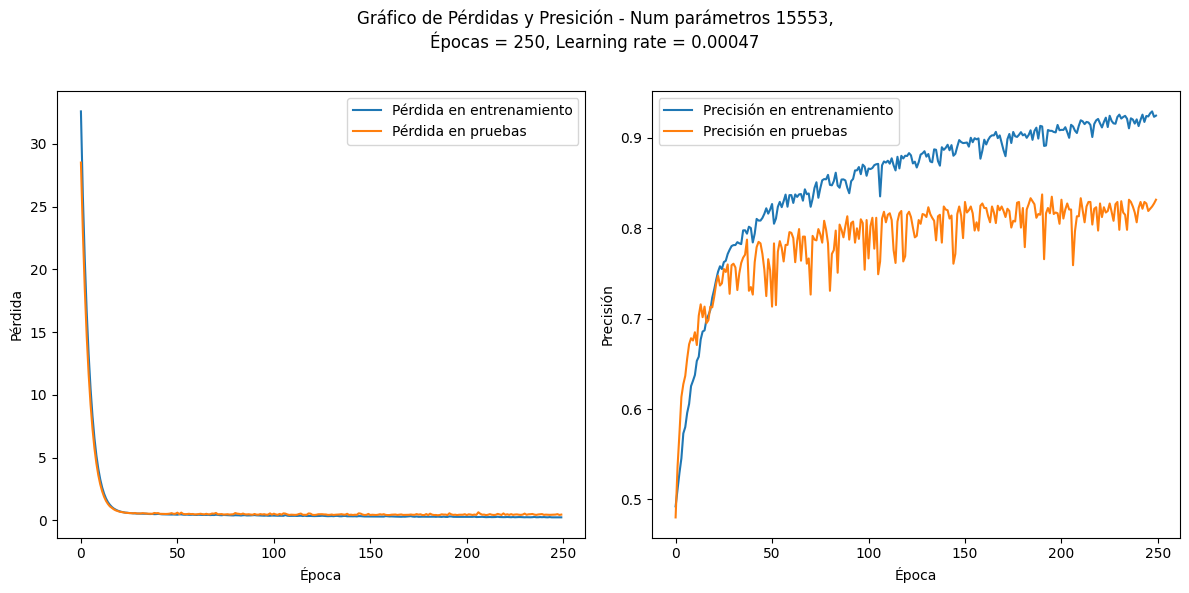

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Graficar la pérdida
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Pérdida en entrenamiento')
plt.plot(val_loss, label='Pérdida en pruebas')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Precisión en entrenamiento')
plt.plot(val_accuracy, label='Precisión en pruebas')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Agregar un título central para la figura
plt.suptitle(f"Gráfico de Pérdidas y Presición"
             f" - Num parámetros {model.count_params()},\n"
             f"Épocas = {epochs}, Learning rate = {new_learning_rate}\n")
#              f"Precisión Ent {accuracy[len(accuracy)-1]:.6f},"
#              f" Precisión Prue {val_accuracy[len(val_accuracy)-1]:.6f}",fontsize=16)
plt.tight_layout()
plt.show()

In [26]:
#Carga Mejor modelo
from keras.models import load_model
# Cargar el modelo guardado en "best_model.h5"
model = load_model('best_model_checkpoint/best_model_epoch_186.h5')

# Evaluación en el conjunto test
_, accuracy = model.evaluate(testMFCCs, testLabels)
print(f'Accuracy: {accuracy}')

38/38 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8300
Accuracy: 0.8299999833106995


In [27]:
# Evaluación en el conjunto train
_, accuracy = model.evaluate(trainMFCCs, trainLabels)
print(f'Accuracy: {accuracy}')

 19/375 [>.............................] - ETA: 1s - loss: 0.2092 - accuracy: 0.9589

2024-04-09 06:28:57.944927: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 60480000 exceeds 10% of free system memory.
2024-04-09 06:28:57.993300: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 60480000 exceeds 10% of free system memory.


375/375 [==============================] - 2s 4ms/step - loss: 0.2592 - accuracy: 0.9218
Accuracy: 0.921833336353302


### Exporta Modelo

In [28]:
#Exporta el modelo
export_dir = 'saved_models/modelo_tesis_binario_Angry_finalv5'
# tf.saved_model.save(model, export_dir)
tf.keras.models.save_model(model, export_dir)

INFO:tensorflow:Assets written to: saved_models/modelo_tesis_binario_Angry_finalv5/assets


INFO:tensorflow:Assets written to: saved_models/modelo_tesis_binario_Angry_finalv5/assets


### Pruebas

In [29]:
#Define Umbral
umbral = 0.5
#Predice probabilidades de las clases (de 0 a 1)
predict = model.predict(evalMFCCs)
# Aplica el umbral para convertir las predicciones en 0 o 1
Label_predict = (predict > umbral).astype(int)
#Dimenciones de vector de etiquetas
print("Dimensiones de vector de etiquetas: ", Label_predict.shape)

25/25 [==============================] - 0s 11ms/step
Dimensiones de vector de etiquetas:  (800, 1)


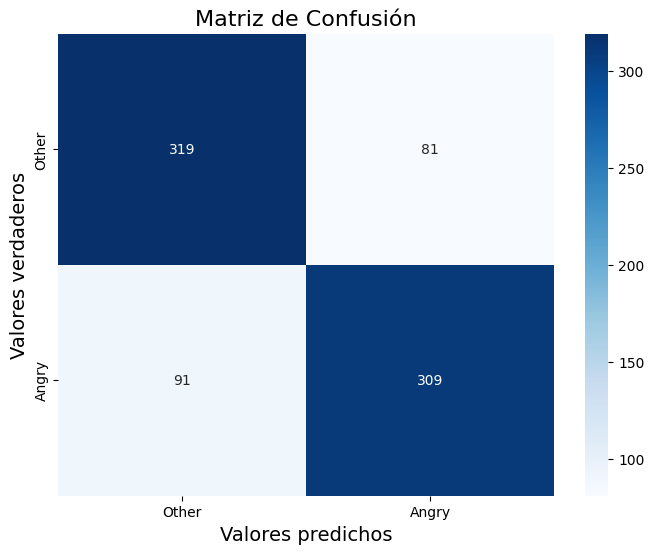

In [30]:
#Calcula matriz de confusión
con_mat = confusion_matrix(evalLabels, Label_predict, labels=clases_vec)
#Convierte matriz en un pandas dataframe
#Rows =    Valores verdaderos
#Columns = Valores predichos
con_mat_df = pd.DataFrame(con_mat, index=emotion_vec, columns=emotion_vec)

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat_df, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Valores predichos', fontsize=14)
plt.ylabel('Valores verdaderos', fontsize=14)
plt.title('Matriz de Confusión', fontsize=16)
plt.show()

In [31]:
# Evaluación en el conjunto de validación
_, accuracy = model.evaluate(evalMFCCs, evalLabels)

print(f'Accuracy: {accuracy}')

25/25 [==============================] - 0s 13ms/step - loss: 0.5331 - accuracy: 0.7850
Accuracy: 0.7850000262260437


In [32]:
#Crea lista vacía de estadísticos
statistics = []

#Ciclo para calcular especificidad, recall, precision y f_score
for label in range(0,2):
    precision, recall, f_score, support = precision_recall_fscore_support(evalLabels==label,
                                           Label_predict==label)
    statistics.append([emotion_vec[label], recall[0], recall[1], precision[1], f_score[1]])

#Convierte resultados en dataframe y agrega columnas
statistics = pd.DataFrame(statistics, columns=["Emotion","Specificity", "Recall", "Precision", "F_Score"])
statistics

,Emotion,Specificity,Recall,Precision,F_Score
0,Other,0.7725,0.7975,0.778049,0.787654
1,Angry,0.7975,0.7725,0.792308,0.782278


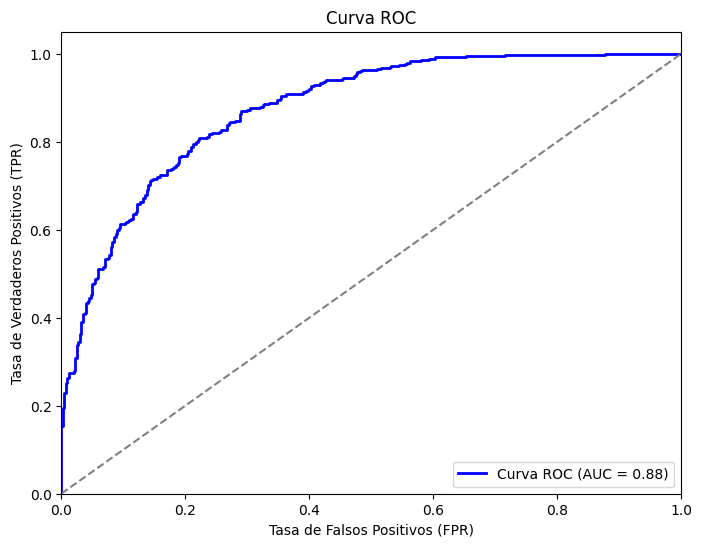

In [33]:
# Supongamos que 'etiquetas_reales' son las etiquetas reales (0 o 1) y 'predicciones' son las predicciones del modelo.
# Asegúrate de tener predicciones continuas (no binarias) en 'predicciones'.

fpr, tpr, umbrales = roc_curve(evalLabels, predict)
area_bajo_curva = roc_auc_score(evalLabels, predict)

# Grafica la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {area_bajo_curva:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# TENSORFLOW LITE

### Convierte Modelo

In [42]:
#Path del modelo
model_dir = 'saved_models/modelo_tesis_binario_Angry_finalv5'

In [43]:
#Convierte el modelo con tensorflow lite desde un modelo guardado
converter = tf.lite.TFLiteConverter.from_saved_model(model_dir)
#Guarda modelo en variable
tflite_model = converter.convert()

2024-04-09 04:58:00.670833: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-04-09 04:58:00.670882: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-04-09 04:58:00.671390: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: saved_models/modelo_tesis_binario_Angry_finalv5
2024-04-09 04:58:00.678619: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-04-09 04:58:00.678639: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: saved_models/modelo_tesis_binario_Angry_finalv5
2024-04-09 04:58:00.693398: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2024-04-09 04:58:00.696122: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2024-04-09 04:58:00.737009: I tensorflow/cc/saved_model/loader.cc:213] Running initializa

In [46]:
#imprime tamaño del modelo en bytes
tflite_model_file = pathlib.Path('modelo_tesis_binario_Angry_finalv5.tflite')
#Escribe bytes del archivo
tflite_model_file.write_bytes(tflite_model)

66608

### Carga Modelo

In [48]:
# Load TFLite model and allocate tensors.
tflite_model_file = 'modelo_tesis_binario_Angry_finalv5.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

#Obtiene los índices de entrada y salida
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [49]:
# Obtener todos los detalles del modelo
model_details = interpreter.get_tensor_details()

# Filtrar los detalles para obtener solo los relacionados con los parámetros
parameter_details = [detail for detail in model_details if 'weight' in detail['name'] or 'bias' in detail['name']]

# Calcular el número total de parámetros
total_parameters = sum(np.prod(detail['shape']) for detail in parameter_details)

print("Número total de parámetros:", total_parameters)

Número total de parámetros: 7200


## Predicciones

### Entrenamiento

In [50]:
#Agrega dimensión para que coincida con la entrada de la red
trainMFCCs = np.expand_dims(trainMFCCs, axis=-1)
trainMFCCs = trainMFCCs.astype(np.float32)

#Predicciones de entrenamiento
predictions = []
for mfcc in trainMFCCs:
    # Asegúrate de que 'mfcc' tenga la forma y tipo de datos correctos
    mfcc = np.expand_dims(mfcc, axis=0).astype(np.float32)
    
    # Establecer la entrada del modelo
    interpreter.set_tensor(input_index, mfcc)
    
    # Realizar la inferencia
    interpreter.invoke()
    
    # Obtener la salida del modelo
    output = interpreter.get_tensor(output_index)
    predictions.append(output)

In [51]:
predictions[0:10]

[array([[0.33874097]], dtype=float32),
 array([[0.47152612]], dtype=float32),
 array([[0.9241117]], dtype=float32),
 array([[0.8521627]], dtype=float32),
 array([[0.884357]], dtype=float32),
 array([[0.8123409]], dtype=float32),
 array([[0.8897024]], dtype=float32),
 array([[0.2839109]], dtype=float32),
 array([[0.9348944]], dtype=float32),
 array([[0.95892054]], dtype=float32)]

In [52]:
umbral = 0.5
predictions = np.array(predictions).squeeze()  # Convertir la lista a un array
predicted_labels = (predictions > umbral).astype(int)  # Usar un umbral si es necesario

# Comparar con las etiquetas reales
accuracy = np.mean(predicted_labels == trainLabels)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.9120833333333334


### Prueba

In [53]:
#Agrega dimensión para que coincida con la entrada de la red
testMFCCs = np.expand_dims(testMFCCs, axis=-1)
testMFCCs = testMFCCs.astype(np.float32)

#Predicciones de entrenamiento
predictions = []
for mfcc in testMFCCs:
    # Asegúrate de que 'mfcc' tenga la forma y tipo de datos correctos
    mfcc = np.expand_dims(mfcc, axis=0).astype(np.float32)
    
    # Establecer la entrada del modelo
    interpreter.set_tensor(input_index, mfcc)
    
    # Realizar la inferencia
    interpreter.invoke()
    
    # Obtener la salida del modelo
    output = interpreter.get_tensor(output_index)
    predictions.append(output)

#Calcula precisión según umbral
umbral = 0.5
predictions = np.array(predictions).squeeze()  # Convertir la lista a un array
predicted_labels = (predictions > umbral).astype(int)  # Usar un umbral si es necesario

# Comparar con las etiquetas reales
accuracy = np.mean(predicted_labels == testLabels)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.8425


### Evaluación

In [54]:
#Agrega dimensión para que coincida con la entrada de la red
evalMFCCs = np.expand_dims(evalMFCCs, axis=-1)
evalMFCCs = evalMFCCs.astype(np.float32)

#Predicciones de entrenamiento
predictions = []
for mfcc in evalMFCCs:
    # Asegúrate de que 'mfcc' tenga la forma y tipo de datos correctos
    mfcc = np.expand_dims(mfcc, axis=0).astype(np.float32)
    
    # Establecer la entrada del modelo
    interpreter.set_tensor(input_index, mfcc)
    
    # Realizar la inferencia
    interpreter.invoke()
    
    # Obtener la salida del modelo
    output = interpreter.get_tensor(output_index)
    predictions.append(output)

#Calcula precisión según umbral
umbral = 0.5
predictions = np.array(predictions).squeeze()  # Convertir la lista a un array
predicted_labels = (predictions > umbral).astype(int)  # Usar un umbral si es necesario

# Comparar con las etiquetas reales
accuracy = np.mean(predicted_labels == evalLabels)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.785


### Matriz de confusión

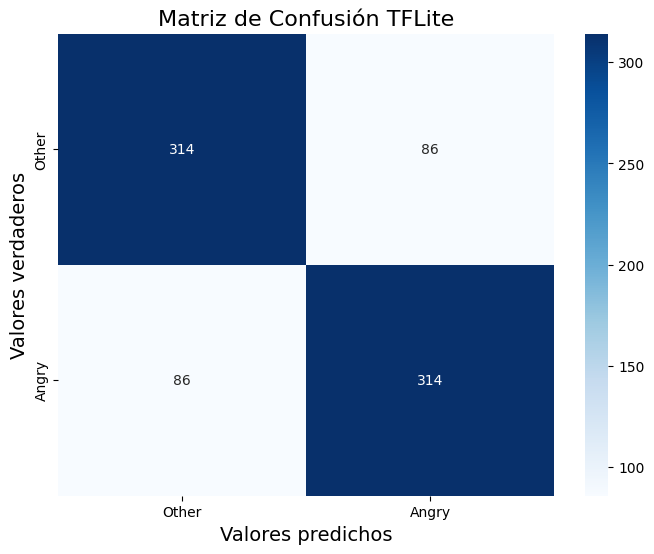

In [55]:
#Predicciones de 0 y 1
predictions_bin = (predictions > umbral).astype(int)

#Vector de clases
clases_vec = [0,1]
emotion_vec = ["Other","Angry"]

#Calcula matriz de confusión
con_mat = confusion_matrix(evalLabels, predictions_bin, labels=clases_vec)
#Convierte matriz en un pandas dataframe
#Rows =    Valores verdaderos
#Columns = Valores predichos
con_mat_df = pd.DataFrame(con_mat, index=emotion_vec, columns=emotion_vec)

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat_df, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Valores predichos', fontsize=14)
plt.ylabel('Valores verdaderos', fontsize=14)
plt.title('Matriz de Confusión TFLite', fontsize=16)
plt.show()

### Curva ROC

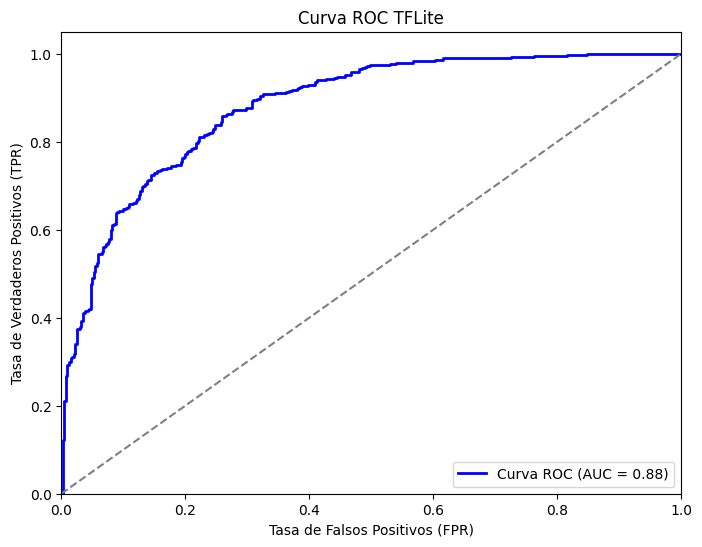

In [56]:
# Supongamos que 'etiquetas_reales' son las etiquetas reales (0 o 1) y 'predicciones' son las predicciones del modelo.
# Asegúrate de tener predicciones continuas (no binarias) en 'predicciones'.

fpr, tpr, umbrales = roc_curve(evalLabels, predictions)
area_bajo_curva = roc_auc_score(evalLabels, predictions)

# Grafica la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {area_bajo_curva:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC TFLite')
plt.legend(loc='lower right')
plt.show()